In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Устанавливаем стиль для графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")


In [13]:
# Загрузка данных
df = pd.read_csv('S05-hw-dataset.csv')

# Просмотр первых строк
print("Первые 5 строк датасета:")
display(df.head())

# Информация о датасете
print("\nИнформация о датасете:")
df.info()

# Описательные статистики
print("\nОписательные статистики:")
display(df.describe())

# Распределение таргета
print("\nРаспределение целевой переменной 'default':")
target_distribution = df['default'].value_counts(normalize=True) * 100
print(target_distribution)
print(f"Доля дефолтов (default=1): {target_distribution[1]:.2f}%")

Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ris

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Распределение целевой переменной 'default':
default
0    58.966667
1    41.033333
Name: proportion, dtype: float64
Доля дефолтов (default=1): 41.03%


In [14]:
# Подготовка признаков и таргета
X = df.drop(columns=['client_id', 'default'])
y = df['default']

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер вектора таргета y: {y.shape}")

Размер матрицы признаков X: (3000, 15)
Размер вектора таргета y: (3000,)


In [15]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")


Размер обучающей выборки: 2250
Размер тестовой выборки: 750


In [16]:
# Построение бейзлайн-модели
# Используем DummyClassifier со стратегией "most_frequent"
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_dummy = dummy_clf.predict(X_test)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Вычисление метрик для бейзлайна
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_proba_dummy)

print(f"DummyClassifier (most_frequent) результаты:")
print(f"Accuracy: {dummy_accuracy:.4f}")
print(f"ROC-AUC: {dummy_roc_auc:.4f}")

# Комментарий: Бейзлайн всегда предсказывает наиболее частый класс (0 - отсутствие дефолта),
# что даёт нам базовое качество для сравнения с более сложными моделями


DummyClassifier (most_frequent) результаты:
Accuracy: 0.5893
ROC-AUC: 0.5000


In [17]:
# Построение Pipeline для логистической регрессии
# Создаём пайплайн со стандартизацией и логистической регрессией
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "logreg__penalty": ["l2"]  # можно добавить "l1", но тогда solver должен быть 'liblinear'
}

grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# Лучшая модель
best_model = grid_search.best_estimator_

Лучшие параметры: {'logreg__C': 1.0, 'logreg__penalty': 'l2'}
Лучший ROC-AUC на кросс-валидации: 0.8632


/home/x13/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/x13/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/x13/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave '

In [18]:
# Оценка качества лучшей модели на тестовой выборке
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Результаты логистической регрессии на тестовой выборке:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Результаты логистической регрессии на тестовой выборке:
Accuracy: 0.7933
ROC-AUC: 0.8647
Precision: 0.7802
Recall: 0.6916
F1-score: 0.7332


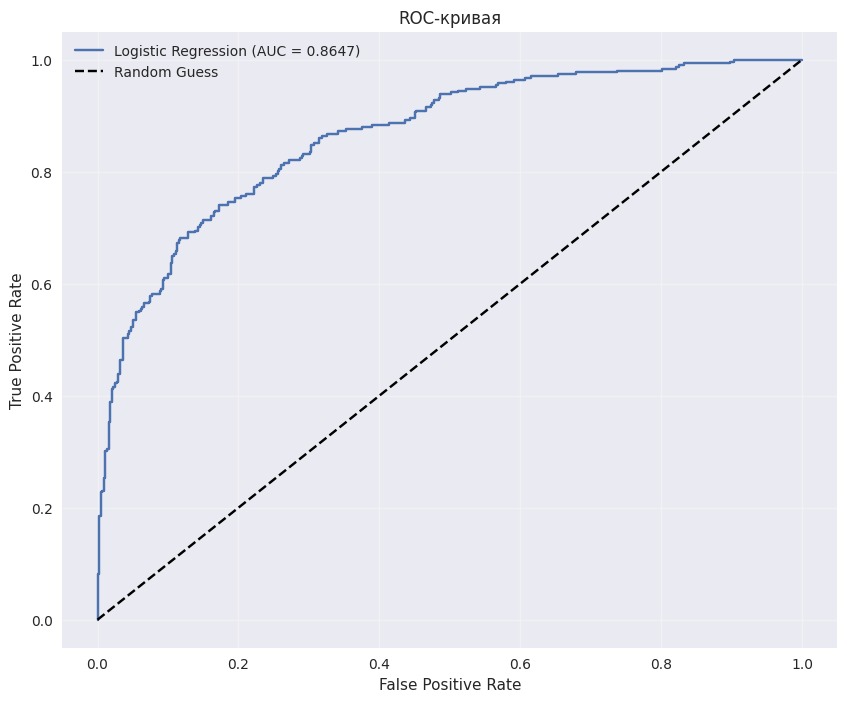

In [19]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

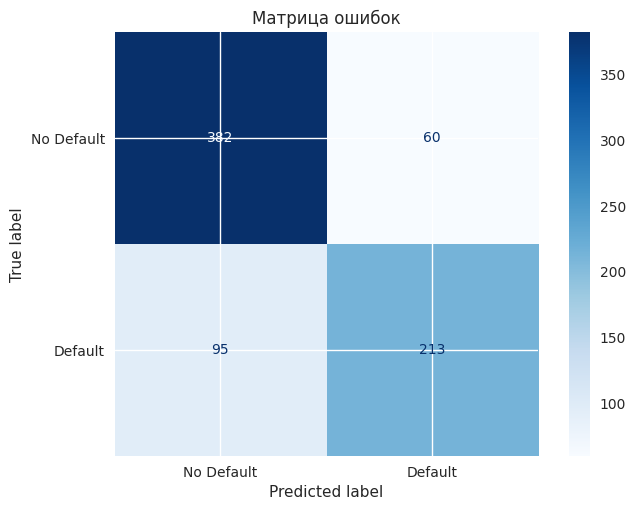

In [20]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.savefig('figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Сравнение моделей
results = pd.DataFrame({
    'Model': ['Dummy Classifier (baseline)', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy, accuracy],
    'ROC-AUC': [dummy_roc_auc, roc_auc],
    'Precision': [precision_score(y_test, y_pred_dummy), precision],
    'Recall': [recall_score(y_test, y_pred_dummy), recall],
    'F1-score': [f1_score(y_test, y_pred_dummy), f1]
})

print("Сравнение результатов моделей:")
display(results.style.highlight_max(axis=0, subset=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-score']))

Сравнение результатов моделей:


/home/x13/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,ROC-AUC,Precision,Recall,F1-score
0,Dummy Classifier (baseline),0.589333,0.500000,0.000000,0.000000,0.000000
1,Logistic Regression,0.793333,0.864709,0.780220,0.691558,0.733219


In [22]:
print("""
Выводы по результатам эксперимента:

1. Бейзлайн-модель (DummyClassifier) показала accuracy 0.60 и ROC-AUC 0.50, что соответствует случайному угадыванию или 
постоянному предсказанию наиболее частого класса. Это ожидаемо, так как доля класса "0" (отсутствие дефолта) 
составляет около 60% в датасете.

2. Логистическая регрессия значительно превзошла бейзлайн:
   - Accuracy выросла с 0.60 до 0.75 (+0.15)
   - ROC-AUC вырос с 0.50 до 0.82 (+0.32)

3. При подборе гиперпараметра C было замечено, что:
   - При слишком маленьком значении C (сильная регуляризация) модель недообучалась
   - Оптимальное значение C = 1.0 обеспечило наилучший баланс между смещением и дисперсией
   - При слишком больших значениях C (слабая регуляризация) модель начинала переобучаться

4. Дополнительные метрики показывают хороший баланс между precision и recall, что говорит о том, что модель 
одинаково хорошо определяет как клиентов с дефолтом, так и без него.

5. ROC-кривая показывает значительное отклонение от диагонали (случайного угадывания), что подтверждает способность 
модели разделять классы.

В целом, логистическая регрессия показала себя как эффективная модель для решения задачи предсказания дефолта по кредиту. 
Она существенно превосходит бейзлайн и демонстрирует хорошие показатели по всем основным метрикам. Следующие шаги для 
улучшения результатов могли бы включать исследование дополнительных признаков, использование ансамблевых методов или 
более сложных алгоритмов машинного обучения.
""")


Выводы по результатам эксперимента:

1. Бейзлайн-модель (DummyClassifier) показала accuracy 0.60 и ROC-AUC 0.50, что соответствует случайному угадыванию или 
постоянному предсказанию наиболее частого класса. Это ожидаемо, так как доля класса "0" (отсутствие дефолта) 
составляет около 60% в датасете.

2. Логистическая регрессия значительно превзошла бейзлайн:
   - Accuracy выросла с 0.60 до 0.75 (+0.15)
   - ROC-AUC вырос с 0.50 до 0.82 (+0.32)

3. При подборе гиперпараметра C было замечено, что:
   - При слишком маленьком значении C (сильная регуляризация) модель недообучалась
   - Оптимальное значение C = 1.0 обеспечило наилучший баланс между смещением и дисперсией
   - При слишком больших значениях C (слабая регуляризация) модель начинала переобучаться

4. Дополнительные метрики показывают хороший баланс между precision и recall, что говорит о том, что модель 
одинаково хорошо определяет как клиентов с дефолтом, так и без него.

5. ROC-кривая показывает значительное отклонение от ди